In [1]:
import numpy as np

In [2]:
import os
os.getcwd()

'C:\\Users\\Лера\\Desktop\\DeepVlom'

In [3]:
dates_and_tels = {} # все номера телефонов с датами 

codes = set() # все возможные коды

with open('./result/result.csv') as f:
    line = f.readline()
    while True:
        line = f.readline() 
        if line == '':
            break
        line = f.readline().strip().split(',')
        if line[0] == '':
            continue
        if line[1] not in dates_and_tels:
            dates_and_tels[line[1]] = set([line[0]])
        else:
            dates_and_tels[line[1]].add(line[0])
        codes.add(line[2])

In [4]:
print(dates_and_tels['80673424910'])

{'2020/01/23', '2020/01/24', '2020/01/31', '2020/01/18', '2020/02/02', '2020/02/03', '2020/01/22', '2020/01/19', '2020/01/25', '2020/01/28', '2020/02/01', '2020/01/20', '2020/01/27', '2020/01/26', '2020/01/30', '2020/01/29'}


In [5]:
print(list(codes))

['108', '512', 'SWIF_ANSWERING_MACHINE', '113', '515', '4', '500', '136', '508', '12', '103', 'SWIF_SIT_IC', '36', '125', '503', '138', '2', 'SWIF_ON_HOOK', 'SWIF_SIT_RO_PRIME', '13', '15', 'SWIF_SIT_NC_PRIME', 'SWIF_CALL_TIMEOUT', '37', '122', '121', 'SWIF_BUSY', '114', '120', '504', '100', '129', '513', '11', '126', '42', '602', '123', '107', '134', 'SWIF_SIT_VC', '601', '501', 'SWIF_FUNCTION_CALL_TIMEOUT', '49', '511', '124', '142', '510', '139', '514', '110', 'SWIF_RESOURCE_LIMIT', '47', '133', '506', '46', 'SWIF_BUSINESS_MACHINE', '140', '102', '131', '604', 'SWIF_SIT_IO', 'SWIF_FAST_BUSY', '40', '127', '130', '104', '502', '509', 'SWIF_LIVE_ANSWER', '135', '605', '38', '128', '45', 'SWIF_EQUIPMENT_BUSY', '137', '91', '105', '119', '39', '505', '92', '132']


In [6]:
intervals = [(1,2),(1,5),(1,10),(10,20),(20,30)] # задаём интервалы в днях для расчёта признаков

Берём, скажем, первые 1000 номеров - с этого момента нужно делать небольшими частями, так как таблица разрастается признаками

In [1]:
list_ = list(range(11))
current_i = 0
step = 4
next_i = current_i
for current_i in range(0, len(list_), step):
      next_i = current_i + step
      batch_data = list_[current_i:next_i]
      print(batch_data)


[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10]


In [7]:
len(list(dates_and_tels.keys()))

972151

In [12]:
# для каждого телефона/даты генерируем таблицу признаков
import datetime
tels = {}

current_i = 0
step = 1000
next_i = current_i
limit = 10000
data = list(dates_and_tels.keys())[400000:500000]
for current_i in range(0, len(data), step):
    next_i = current_i + step
    batch_data = data[current_i:next_i]
    for tel in batch_data:
        tels[tel] = {}
        for date in dates_and_tels[tel]:
            tels[tel][date] = {}
            for interval in intervals:
                for code in codes:
                    tels[tel][date][code+'_'+str(interval[0])+'_'+str(interval[1])] = 0
            tels[tel][date]['target'] = 0
    if current_i%limit == 0:        
        with open('./result/result.csv') as f:
            line = f.readline()
            while True:
                line = f.readline() 
                if line == '':
                    break
                line = f.readline().strip().split(',')
                if line[0] == '':
                    continue
                if line[1] in tels:
                    if line[2] in ['100','102','104','107','120','122','127','128','129','130','131','503','504','505','600','601']:
                        tels[line[1]][line[0]]['target'] = 1
                    current_date = datetime.datetime.strptime(line[0], '%Y/%m/%d')
                    for date in tels[line[1]]:
                        date2 = datetime.datetime.strptime(date, '%Y/%m/%d')
                        for interval in intervals:
                            if (date2 - current_date).days >= interval[0] and (date2 - current_date).days < interval[1]:
                                tels[line[1]][line[0]][line[2]+'_'+str(interval[0])+'_'+str(interval[1])] +=1

        f = open('./result/out.csv','a+')
        f.write('tel\tdate\t')
        for interval in intervals:
            for code in codes:
                f.write(code+'_'+str(interval[0])+'_'+str(interval[1])+'\t')
        f.write('target\n')
        for tel in tels:
            for date in tels[tel]:
                f.write(tel+'\t'+date+'\t')
                for interval in intervals:
                    for code in codes:
                        f.write(str(tels[tel][date][code+'_'+str(interval[0])+'_'+str(interval[1])])+'\t')
                f.write(str(tels[tel][date]['target'])+'\n')
        f.close()
        tels = {}

In [179]:
print(tels['80673424910'])

{'2020/01/25': {'130_1_2': 0, '92_1_2': 0, '604_1_2': 0, '127_1_2': 0, 'SWIF_EQUIPMENT_BUSY_1_2': 0, '124_1_2': 0, 'SWIF_ANSWERING_MACHINE_1_2': 0, 'SWIF_FUNCTION_CALL_TIMEOUT_1_2': 0, '107_1_2': 0, '15_1_2': 0, '138_1_2': 0, '504_1_2': 0, '36_1_2': 0, '135_1_2': 0, '4_1_2': 0, '128_1_2': 0, '103_1_2': 0, '100_1_2': 0, '142_1_2': 0, '502_1_2': 0, '47_1_2': 0, '139_1_2': 0, '123_1_2': 0, '601_1_2': 0, '102_1_2': 0, '131_1_2': 0, '113_1_2': 0, '114_1_2': 0, 'SWIF_ON_HOOK_1_2': 0, '132_1_2': 0, 'SWIF_RESOURCE_LIMIT_1_2': 0, '510_1_2': 0, 'SWIF_CALL_TIMEOUT_1_2': 0, '13_1_2': 0, '126_1_2': 0, 'SWIF_LIVE_ANSWER_1_2': 0, '38_1_2': 0, '121_1_2': 0, '509_1_2': 0, '500_1_2': 0, '137_1_2': 0, '134_1_2': 0, '501_1_2': 0, 'SWIF_SIT_IO_1_2': 0, 'SWIF_SIT_NC_PRIME_1_2': 0, '11_1_2': 0, '602_1_2': 0, '511_1_2': 0, '45_1_2': 0, '49_1_2': 0, '37_1_2': 0, '605_1_2': 0, '508_1_2': 0, 'SWIF_SIT_IC_1_2': 0, '140_1_2': 0, 'SWIF_SIT_RO_PRIME_1_2': 0, '12_1_2': 0, '91_1_2': 0, '119_1_2': 0, '46_1_2': 0, '503_

In [180]:
# Прочёсываем исходный файл и заполняем таблицу с признаками
import datetime

with open('./result/result.csv') as f:
    line = f.readline()
    while True:
        line = f.readline() 
        if line == '':
            break
        line = f.readline().strip().split(',')
        if line[0] == '':
            continue
        if line[1] in tels:
            if line[2] in ['100','102','104','107','120','122','127','128','129','130','131','503','504','505','600','601']:
                tels[line[1]][line[0]]['target'] = 1
            current_date = datetime.datetime.strptime(line[0], '%Y/%m/%d')
            for date in tels[line[1]]:
                date2 = datetime.datetime.strptime(date, '%Y/%m/%d')
                for interval in intervals:
                    if (date2 - current_date).days >= interval[0] and (date2 - current_date).days < interval[1]:
                        tels[line[1]][line[0]][line[2]+'_'+str(interval[0])+'_'+str(interval[1])] +=1

In [181]:
# Сохраняем таблицу с признаками

f = open('./result/out.csv','w')

f.write('tel\tdate\t')

for interval in intervals:
    for code in codes:
        f.write(code+'_'+str(interval[0])+'_'+str(interval[1])+'\t')
f.write('target\n')

for tel in tels:
    for date in tels[tel]:
        f.write(tel+'\t'+date+'\t')
        for interval in intervals:
            for code in codes:
                f.write(str(tels[tel][date][code+'_'+str(interval[0])+'_'+str(interval[1])])+'\t')
        f.write(str(tels[tel][date]['target'])+'\n')
f.close()

# Формируем выборку

In [1]:
import pandas as pd
data = pd.read_csv('./result/out-002.csv',header = 0, sep='\t', engine='python') 

In [14]:
data

,tel,SWIF_RESOURCE_LIMIT_1_2,SWIF_LIVE_ANSWER_1_2,SWIF_SIT_IO_1_2,506_1_2,39_1_2,513_1_2,SWIF_EQUIPMENT_BUSY_1_2,129_1_2,142_1_2,...,date_2020/01/26,date_2020/01/27,date_2020/01/28,date_2020/01/29,date_2020/01/30,date_2020/01/31,date_2020/02/01,date_2020/02/02,date_2020/02/03,target
678120,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,1,0,0,0,0,0,0,0,0
678115,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
678116,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,1,0,0,0,0,0,0,1
678117,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,1,0
678118,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,2.238956,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280309,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,1,0,0,0,0,0,0,0
280306,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
280308,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
280299,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0


In [2]:
#сколько строк с заголовком внутри
data[data['tel'] == 'tel']

,tel,date,SWIF_RESOURCE_LIMIT_1_2,SWIF_LIVE_ANSWER_1_2,SWIF_SIT_IO_1_2,506_1_2,39_1_2,513_1_2,SWIF_EQUIPMENT_BUSY_1_2,129_1_2,...,131_20_30,SWIF_ON_HOOK_20_30,104_20_30,12_20_30,514_20_30,123_20_30,SWIF_FUNCTION_CALL_TIMEOUT_20_30,2_20_30,125_20_30,target
55233,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
171380,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
230979,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
338695,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
344383,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
435497,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
518060,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
571975,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
659397,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target
711247,tel,date,108_1_2,512_1_2,SWIF_ANSWERING_MACHINE_1_2,113_1_2,515_1_2,4_1_2,500_1_2,136_1_2,...,SWIF_EQUIPMENT_BUSY_20_30,137_20_30,91_20_30,105_20_30,119_20_30,39_20_30,505_20_30,92_20_30,132_20_30,target


In [2]:
#сортировка по телефону, чтобы опустить все строки с заголовком вниз
data.sort_values(by=['tel'], inplace=True)

In [3]:
#удалить n строк, где есть заголовок
data.drop(data.tail(15).index,inplace=True)

# Векторизация

In [4]:
#drop unnecessary columns for 20 and 30 days
data.drop([ '506_10_20', '39_10_20', '513_10_20', '2_20_30', '125_20_30','SWIF_RESOURCE_LIMIT_10_20', 'SWIF_LIVE_ANSWER_10_20', 'SWIF_SIT_IO_10_20',  'SWIF_EQUIPMENT_BUSY_10_20', '129_10_20', '142_10_20', '127_10_20', '38_10_20', '36_10_20', '119_10_20', 'SWIF_SIT_VC_10_20', 'SWIF_SIT_IC_10_20', '4_10_20', '120_10_20', '105_10_20', 'SWIF_ANSWERING_MACHINE_10_20', '49_10_20', '505_10_20', '508_10_20', '102_10_20', 'SWIF_FAST_BUSY_10_20', '138_10_20', '504_10_20', '510_10_20', 'SWIF_BUSY_10_20', '103_10_20', '113_10_20', '45_10_20', '108_10_20', '15_10_20', '91_10_20', '135_10_20', '37_10_20', '604_10_20', '140_10_20', '501_10_20', '500_10_20', '134_10_20', '107_10_20', 'SWIF_SIT_NC_PRIME_10_20', '509_10_20', '92_10_20', '128_10_20', '136_10_20', '110_10_20', '601_10_20', '40_10_20', '132_10_20', '602_10_20', '130_10_20', '137_10_20', '42_10_20', '515_10_20', '114_10_20', '126_10_20', '11_10_20', '139_10_20', '47_10_20', '124_10_20', 'SWIF_CALL_TIMEOUT_10_20', '503_10_20', '121_10_20', '133_10_20', 'SWIF_BUSINESS_MACHINE_10_20', '511_10_20', '122_10_20', '512_10_20', '100_10_20', '46_10_20', '502_10_20', 'SWIF_SIT_RO_PRIME_10_20', '13_10_20', '605_10_20', '131_10_20', 'SWIF_ON_HOOK_10_20', '104_10_20', '12_10_20', '514_10_20', '123_10_20', 'SWIF_FUNCTION_CALL_TIMEOUT_10_20', '2_10_20', '125_10_20', 'SWIF_RESOURCE_LIMIT_20_30', 'SWIF_LIVE_ANSWER_20_30', 'SWIF_SIT_IO_20_30', '506_20_30', '39_20_30', '513_20_30', 'SWIF_EQUIPMENT_BUSY_20_30', '129_20_30', '142_20_30', '127_20_30', '38_20_30', '36_20_30', '119_20_30', 'SWIF_SIT_VC_20_30', 'SWIF_SIT_IC_20_30', '4_20_30', '120_20_30', '105_20_30', 'SWIF_ANSWERING_MACHINE_20_30', '49_20_30', '505_20_30', '508_20_30', '102_20_30', 'SWIF_FAST_BUSY_20_30', '138_20_30', '504_20_30', '510_20_30', 'SWIF_BUSY_20_30', '103_20_30', '113_20_30', '45_20_30', '108_20_30', '15_20_30', '91_20_30', '135_20_30', '37_20_30', '604_20_30', '140_20_30', '501_20_30', '500_20_30', '134_20_30', '107_20_30', 'SWIF_SIT_NC_PRIME_20_30', '509_20_30', '92_20_30', '128_20_30', '136_20_30', '110_20_30', '601_20_30', '40_20_30', '132_20_30', '602_20_30', '130_20_30', '137_20_30', '42_20_30', '515_20_30', '114_20_30', '126_20_30', '11_20_30', '139_20_30', '47_20_30', '124_20_30', 'SWIF_CALL_TIMEOUT_20_30', '503_20_30', '121_20_30', '133_20_30', 'SWIF_BUSINESS_MACHINE_20_30', '511_20_30', '122_20_30', '512_20_30', '100_20_30', '46_20_30', '502_20_30', 'SWIF_SIT_RO_PRIME_20_30', '13_20_30', '605_20_30', '131_20_30', 'SWIF_ON_HOOK_20_30', '104_20_30', '12_20_30', '514_20_30', '123_20_30', 'SWIF_FUNCTION_CALL_TIMEOUT_20_30'], axis = 1,inplace=True) 

In [5]:
#convert string values to int
data[['503_1_10', '121_1_10', '133_1_10',  '511_1_10', \
             '122_1_10', '512_1_10', '100_1_10', '46_1_10', '502_1_10', \
             '13_1_10', '605_1_10', '131_1_10',  '104_1_10', '12_1_10', '514_1_10', \
             '123_1_10',  '2_1_10', '125_1_10','506_1_2', '39_1_2', '513_1_2','38_1_2', \
             '36_1_2', '119_1_2','4_1_2', '120_1_2', '105_1_2', '49_1_2', '505_1_2', '508_1_2', \
             '102_1_2', '138_1_2', '504_1_2', '510_1_2', '103_1_2', '113_1_2', '45_1_2',\
             '108_1_2', '15_1_2', '91_1_2', '135_1_2', '37_1_2', '604_1_2', '140_1_2', '501_1_2', \
             '500_1_2', '134_1_2', '107_1_2', '509_1_2', '92_1_2', '128_1_2', '136_1_2', '110_1_2', \
             '601_1_2', '40_1_2', '132_1_2', '602_1_2', '130_1_2', '137_1_2', '42_1_2', '515_1_2', \
             '114_1_2', '126_1_2', '11_1_2', '139_1_2', '47_1_2', '124_1_2', '503_1_2', '121_1_2', \
             '133_1_2', '511_1_2', '122_1_2', '512_1_2', '100_1_2', '46_1_2', '502_1_2', '13_1_2', \
             '605_1_2', '131_1_2','104_1_2', '12_1_2', '514_1_2', '123_1_2', '2_1_2', '125_1_2',   \
             '506_1_5', '39_1_5', '513_1_5', '129_1_5', '142_1_5', '127_1_5', '38_1_5', '36_1_5', \
             '119_1_5', '4_1_5', '120_1_5', '105_1_5', '49_1_5', '505_1_5', '508_1_5', '102_1_5', \
             '138_1_5', '504_1_5', '510_1_5', '103_1_5', '113_1_5', '45_1_5', '108_1_5', '15_1_5',\
             '91_1_5', '135_1_5', '37_1_5', '604_1_5', '140_1_5', '501_1_5', '500_1_5', '134_1_5', \
             '107_1_5', '509_1_5', '92_1_5', '128_1_5', '136_1_5', '110_1_5', '601_1_5', '40_1_5', \
             '132_1_5', '602_1_5', '130_1_5', '137_1_5', '42_1_5', '515_1_5', '114_1_5', '126_1_5', \
             '11_1_5', '139_1_5', '47_1_5', '124_1_5', '503_1_5', '121_1_5', '133_1_5', '511_1_5', '122_1_5', '512_1_5', \
             '100_1_5', '46_1_5', '502_1_5', '13_1_5', '605_1_5', '131_1_5', '104_1_5', '12_1_5', '514_1_5', '123_1_5',  \
             '2_1_5', '125_1_5','506_1_10', '39_1_10', '513_1_10', '129_1_10', '142_1_10', '127_1_10', '38_1_10', '36_1_10',\
             '119_1_10',  '4_1_10', '120_1_10', '105_1_10', '49_1_10', '505_1_10', '508_1_10', '102_1_10', '138_1_10', \
             '504_1_10', '510_1_10', '103_1_10', '113_1_10', '45_1_10', '108_1_10', '15_1_10', '91_1_10', '135_1_10', \
             '37_1_10', '604_1_10', '140_1_10', '501_1_10', '500_1_10', '134_1_10', '107_1_10', '509_1_10', '92_1_10', \
             '128_1_10', '136_1_10', '110_1_10', '601_1_10', '40_1_10', '132_1_10', '602_1_10', '130_1_10', '137_1_10', \
             '42_1_10', '515_1_10', '114_1_10', '126_1_10', '11_1_10', '139_1_10', '47_1_10', '124_1_10',\
      'SWIF_RESOURCE_LIMIT_1_2','SWIF_LIVE_ANSWER_1_2', 'SWIF_SIT_IO_1_2', 'SWIF_EQUIPMENT_BUSY_1_2', '129_1_2', \
      '142_1_2', '127_1_2', 'SWIF_SIT_VC_1_2', 'SWIF_SIT_IC_1_2', 'SWIF_ANSWERING_MACHINE_1_2', 'SWIF_FAST_BUSY_1_2',
      'SWIF_BUSY_1_2', 'SWIF_SIT_NC_PRIME_1_2', 'SWIF_CALL_TIMEOUT_1_2', 'SWIF_BUSINESS_MACHINE_1_2', 'SWIF_SIT_RO_PRIME_1_2',\
      'SWIF_ON_HOOK_1_2', 'SWIF_FUNCTION_CALL_TIMEOUT_1_2', 'SWIF_RESOURCE_LIMIT_1_5', 'SWIF_LIVE_ANSWER_1_5', \
      'SWIF_SIT_IO_1_5', 'SWIF_EQUIPMENT_BUSY_1_5', 'SWIF_SIT_VC_1_5', 'SWIF_SIT_IC_1_5', 'SWIF_ANSWERING_MACHINE_1_5',\
      'SWIF_FAST_BUSY_1_5', 'SWIF_BUSY_1_5', 'SWIF_SIT_NC_PRIME_1_5', 'SWIF_CALL_TIMEOUT_1_5', 'SWIF_BUSINESS_MACHINE_1_5', \
      'SWIF_SIT_RO_PRIME_1_5', 'SWIF_ON_HOOK_1_5', 'SWIF_FUNCTION_CALL_TIMEOUT_1_5', 'SWIF_RESOURCE_LIMIT_1_10',\
      'SWIF_LIVE_ANSWER_1_10', 'SWIF_SIT_IO_1_10', 'SWIF_EQUIPMENT_BUSY_1_10', 'SWIF_SIT_VC_1_10', 'SWIF_SIT_IC_1_10', \
      'SWIF_ANSWERING_MACHINE_1_10', 'SWIF_FAST_BUSY_1_10', 'SWIF_BUSY_1_10', 'SWIF_SIT_NC_PRIME_1_10', \
      'SWIF_CALL_TIMEOUT_1_10', 'SWIF_BUSINESS_MACHINE_1_10', 'SWIF_SIT_RO_PRIME_1_10', 'SWIF_ON_HOOK_1_10',\
      'SWIF_FUNCTION_CALL_TIMEOUT_1_10', 'target']]\
= data[['503_1_10', '121_1_10', '133_1_10',  '511_1_10', '122_1_10', '512_1_10', '100_1_10', '46_1_10', '502_1_10', \
        '13_1_10', '605_1_10', '131_1_10',  '104_1_10', '12_1_10', '514_1_10', '123_1_10',  '2_1_10', '125_1_10','506_1_2',\
        '39_1_2', '513_1_2','38_1_2', '36_1_2', '119_1_2','4_1_2', '120_1_2', '105_1_2','49_1_2', '505_1_2', '508_1_2', \
        '102_1_2', '138_1_2', '504_1_2', '510_1_2', '103_1_2', '113_1_2', '45_1_2', '108_1_2', '15_1_2', '91_1_2', '135_1_2',\
        '37_1_2', '604_1_2', '140_1_2', '501_1_2', '500_1_2', '134_1_2', '107_1_2', '509_1_2', '92_1_2', '128_1_2', '136_1_2', \
        '110_1_2', '601_1_2', '40_1_2', '132_1_2', '602_1_2', '130_1_2', '137_1_2', '42_1_2', '515_1_2', '114_1_2', '126_1_2', \
        '11_1_2', '139_1_2', '47_1_2', '124_1_2', '503_1_2', '121_1_2', '133_1_2', '511_1_2', '122_1_2', '512_1_2', '100_1_2', \
        '46_1_2', '502_1_2', '13_1_2', '605_1_2', '131_1_2','104_1_2', '12_1_2', '514_1_2', '123_1_2', '2_1_2', '125_1_2',   \
        '506_1_5', '39_1_5', '513_1_5', '129_1_5', '142_1_5', '127_1_5', '38_1_5', '36_1_5', '119_1_5', '4_1_5', '120_1_5', \
        '105_1_5', '49_1_5', '505_1_5', '508_1_5', '102_1_5', '138_1_5', '504_1_5', '510_1_5', '103_1_5', '113_1_5', '45_1_5', \
        '108_1_5', '15_1_5', '91_1_5', '135_1_5', '37_1_5', '604_1_5', '140_1_5', '501_1_5', '500_1_5', '134_1_5', '107_1_5', \
        '509_1_5', '92_1_5', '128_1_5', '136_1_5', '110_1_5', '601_1_5', '40_1_5', '132_1_5', '602_1_5', '130_1_5', '137_1_5',\
        '42_1_5', '515_1_5', '114_1_5', '126_1_5', '11_1_5', '139_1_5', '47_1_5', '124_1_5', '503_1_5', '121_1_5', '133_1_5', \
        '511_1_5', '122_1_5', '512_1_5', '100_1_5', '46_1_5', '502_1_5', '13_1_5', '605_1_5', '131_1_5', '104_1_5', '12_1_5', \
        '514_1_5', '123_1_5',  '2_1_5', '125_1_5','506_1_10', '39_1_10', '513_1_10', '129_1_10', '142_1_10', '127_1_10', \
        '38_1_10', '36_1_10', '119_1_10',  '4_1_10', '120_1_10', '105_1_10', '49_1_10', '505_1_10', '508_1_10', '102_1_10', \
        '138_1_10', '504_1_10', '510_1_10', '103_1_10', '113_1_10', '45_1_10', '108_1_10', '15_1_10', '91_1_10', '135_1_10', \
        '37_1_10', '604_1_10', '140_1_10', '501_1_10', '500_1_10', '134_1_10', '107_1_10', '509_1_10', '92_1_10', '128_1_10', \
        '136_1_10', '110_1_10', '601_1_10', '40_1_10', '132_1_10', '602_1_10', '130_1_10', '137_1_10', '42_1_10', '515_1_10', \
        '114_1_10', '126_1_10', '11_1_10', '139_1_10', '47_1_10', '124_1_10',\
      'SWIF_RESOURCE_LIMIT_1_2','SWIF_LIVE_ANSWER_1_2', 'SWIF_SIT_IO_1_2', 'SWIF_EQUIPMENT_BUSY_1_2', '129_1_2', \
      '142_1_2', '127_1_2', 'SWIF_SIT_VC_1_2', 'SWIF_SIT_IC_1_2', 'SWIF_ANSWERING_MACHINE_1_2', 'SWIF_FAST_BUSY_1_2',
      'SWIF_BUSY_1_2', 'SWIF_SIT_NC_PRIME_1_2', 'SWIF_CALL_TIMEOUT_1_2', 'SWIF_BUSINESS_MACHINE_1_2', 'SWIF_SIT_RO_PRIME_1_2',\
      'SWIF_ON_HOOK_1_2', 'SWIF_FUNCTION_CALL_TIMEOUT_1_2', 'SWIF_RESOURCE_LIMIT_1_5', 'SWIF_LIVE_ANSWER_1_5', \
      'SWIF_SIT_IO_1_5', 'SWIF_EQUIPMENT_BUSY_1_5', 'SWIF_SIT_VC_1_5', 'SWIF_SIT_IC_1_5', 'SWIF_ANSWERING_MACHINE_1_5',\
      'SWIF_FAST_BUSY_1_5', 'SWIF_BUSY_1_5', 'SWIF_SIT_NC_PRIME_1_5', 'SWIF_CALL_TIMEOUT_1_5', 'SWIF_BUSINESS_MACHINE_1_5', \
      'SWIF_SIT_RO_PRIME_1_5', 'SWIF_ON_HOOK_1_5', 'SWIF_FUNCTION_CALL_TIMEOUT_1_5', 'SWIF_RESOURCE_LIMIT_1_10',\
      'SWIF_LIVE_ANSWER_1_10', 'SWIF_SIT_IO_1_10', 'SWIF_EQUIPMENT_BUSY_1_10', 'SWIF_SIT_VC_1_10', 'SWIF_SIT_IC_1_10', \
      'SWIF_ANSWERING_MACHINE_1_10', 'SWIF_FAST_BUSY_1_10', 'SWIF_BUSY_1_10', 'SWIF_SIT_NC_PRIME_1_10', \
      'SWIF_CALL_TIMEOUT_1_10', 'SWIF_BUSINESS_MACHINE_1_10', 'SWIF_SIT_RO_PRIME_1_10', 'SWIF_ON_HOOK_1_10',\
      'SWIF_FUNCTION_CALL_TIMEOUT_1_10', 'target']].astype(int)

In [6]:
data['tel'] = pd.to_numeric(data['tel'])

In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('categorical_columns: \n' + str(categorical_columns))
print()
print('numerical_columns: \n' + str(numerical_columns))

categorical_columns: 
['date']

numerical_columns: 
['tel', 'SWIF_RESOURCE_LIMIT_1_2', 'SWIF_LIVE_ANSWER_1_2', 'SWIF_SIT_IO_1_2', '506_1_2', '39_1_2', '513_1_2', 'SWIF_EQUIPMENT_BUSY_1_2', '129_1_2', '142_1_2', '127_1_2', '38_1_2', '36_1_2', '119_1_2', 'SWIF_SIT_VC_1_2', 'SWIF_SIT_IC_1_2', '4_1_2', '120_1_2', '105_1_2', 'SWIF_ANSWERING_MACHINE_1_2', '49_1_2', '505_1_2', '508_1_2', '102_1_2', 'SWIF_FAST_BUSY_1_2', '138_1_2', '504_1_2', '510_1_2', 'SWIF_BUSY_1_2', '103_1_2', '113_1_2', '45_1_2', '108_1_2', '15_1_2', '91_1_2', '135_1_2', '37_1_2', '604_1_2', '140_1_2', '501_1_2', '500_1_2', '134_1_2', '107_1_2', 'SWIF_SIT_NC_PRIME_1_2', '509_1_2', '92_1_2', '128_1_2', '136_1_2', '110_1_2', '601_1_2', '40_1_2', '132_1_2', '602_1_2', '130_1_2', '137_1_2', '42_1_2', '515_1_2', '114_1_2', '126_1_2', '11_1_2', '139_1_2', '47_1_2', '124_1_2', 'SWIF_CALL_TIMEOUT_1_2', '503_1_2', '121_1_2', '133_1_2', 'SWIF_BUSINESS_MACHINE_1_2', '511_1_2', '122_1_2', '512_1_2', '100_1_2', '46_1_2', '502_1_2', 'S

Есть два типа колонок: с числовым и строковым представлением. Оба типа необходимо нормализовать для обучения модели

In [8]:
data_describe = data.describe(include = [object])
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['date_2019/11/20', 'date_2019/11/21', 'date_2019/11/22',
       'date_2019/11/23', 'date_2019/11/24', 'date_2019/11/25',
       'date_2019/11/26', 'date_2019/11/27', 'date_2019/11/28',
       'date_2019/11/29', 'date_2019/11/30', 'date_2019/12/01',
       'date_2019/12/02', 'date_2019/12/03', 'date_2019/12/04',
       'date_2019/12/05', 'date_2019/12/06', 'date_2019/12/07',
       'date_2019/12/08', 'date_2019/12/09', 'date_2019/12/10',
       'date_2019/12/11', 'date_2019/12/12', 'date_2019/12/13',
       'date_2019/12/14', 'date_2019/12/15', 'date_2019/12/16',
       'date_2019/12/17', 'date_2019/12/18', 'date_2019/12/19',
       'date_2019/12/20', 'date_2019/12/21', 'date_2019/12/22',
       'date_2019/12/23', 'date_2019/12/24', 'date_2019/12/25',
       'date_2019/12/26', 'date_2019/12/27', 'date_2019/12/28',
       'date_2019/12/29', 'date_2019/12/30', 'date_2019/12/31',
       'date_2020/01/03', 'date_2020/01/04', 'date_2020/01/05',
       'date_2020/01/06', 'date_2020/01/

In [9]:
data_numerical = data[numerical_columns].drop(('target'), axis = 1)
data_numerical

,tel,SWIF_RESOURCE_LIMIT_1_2,SWIF_LIVE_ANSWER_1_2,SWIF_SIT_IO_1_2,506_1_2,39_1_2,513_1_2,SWIF_EQUIPMENT_BUSY_1_2,129_1_2,142_1_2,...,605_1_10,131_1_10,SWIF_ON_HOOK_1_10,104_1_10,12_1_10,514_1_10,123_1_10,SWIF_FUNCTION_CALL_TIMEOUT_1_10,2_1_10,125_1_10
678120,80000047990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678115,80000047990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678116,80000047990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678117,80000047990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
678118,80000047990,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280309,89999964837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280306,89999964837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280308,89999964837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280299,89999964837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import numpy as np
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical = data_numerical.replace(np.nan, 0)
data_numerical

,tel,SWIF_RESOURCE_LIMIT_1_2,SWIF_LIVE_ANSWER_1_2,SWIF_SIT_IO_1_2,506_1_2,39_1_2,513_1_2,SWIF_EQUIPMENT_BUSY_1_2,129_1_2,142_1_2,...,605_1_10,131_1_10,SWIF_ON_HOOK_1_10,104_1_10,12_1_10,514_1_10,123_1_10,SWIF_FUNCTION_CALL_TIMEOUT_1_10,2_1_10,125_1_10
678120,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
678115,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
678116,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
678117,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
678118,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,2.238956,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280309,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
280306,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
280308,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877
280299,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0.0,-0.008571,-0.001,-0.030446,-0.005389,-0.007228,-0.06902,-0.005473,-0.057654,-0.001877


In [11]:
data = pd.concat((data_numerical, data_nonbinary, data['target']), axis = 1)
print(data.shape)

(999985, 330)


In [12]:
data

,tel,SWIF_RESOURCE_LIMIT_1_2,SWIF_LIVE_ANSWER_1_2,SWIF_SIT_IO_1_2,506_1_2,39_1_2,513_1_2,SWIF_EQUIPMENT_BUSY_1_2,129_1_2,142_1_2,...,date_2020/01/26,date_2020/01/27,date_2020/01/28,date_2020/01/29,date_2020/01/30,date_2020/01/31,date_2020/02/01,date_2020/02/02,date_2020/02/03,target
678120,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,1,0,0,0,0,0,0,0,0
678115,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
678116,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,1,0,0,0,0,0,0,1
678117,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,1,0
678118,-1.729593,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,2.238956,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280309,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,1,0,0,0,0,0,0,0
280306,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
280308,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0
280299,1.732993,-0.019645,-0.012571,-0.084637,-0.069299,-0.002,-0.130851,0.0,-0.004899,-0.011748,...,0,0,0,0,0,0,0,0,0,0


import csv


f = open('./result/norm.csv', 'w')

with f:

    writer = csv.writer(f)
    writer.writerows(data)

# X and Y

In [13]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ['date'])], remainder='passthrough')
#data = np.array(columnTransformer.fit_transform(data), dtype = np.str)

In [14]:
X = data.drop(('target'), axis = 1) # выбрасываем столбец 'y'
y = data['target']
feature_names = X.columns

In [15]:
type(feature_names)

pandas.core.indexes.base.Index

In [16]:
print(X.shape)
print(y.shape)
N, d = X.shape

(999985, 329)
(999985,)


In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
type(y)

pandas.core.series.Series

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle=False)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

799988 199997


In [20]:
y_train

678120    0
678115    0
678116    1
678117    0
678118    0
         ..
936841    0
936840    0
936839    0
936838    0
936837    0
Name: target, Length: 799988, dtype: int32

# Random forest

In [35]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Ошибка обучения: ', err_train*100, '%', '\nОшибка теста : ', err_test*100,'%\n')
print('Точность обучения: ', 100 - err_train*100, '%', '\nТочность теста : ', 100 - err_test*100,'%')

Ошибка обучения:  0.004625069376040641 % 
Ошибка теста :  1.2975194627919417 %

Точность обучения:  99.99537493062395 % 
Точность теста :  98.70248053720806 %


ert = ensemble.ExtraTreesClassifier(n_estimators = 500).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Ошибка обучения: ', err_train*100,'%', '\nОшибка теста : ', err_test*100,'%')

# Classification_report for RF

In [36]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, rf.predict(X_test), target_names=target_names))
#y_true is y_test
#y_pred is rf.predict(X_test) ?

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    195806
           1       0.79      0.52      0.63      4191

    accuracy                           0.99    199997
   macro avg       0.89      0.76      0.81    199997
weighted avg       0.99      0.99      0.99    199997



# ROC AUC for RF

In [37]:
import sklearn.metrics as metrics
tr_probs = rf.predict_proba(X_test)
tr_preds = tr_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tr_preds)
roc_auc = metrics.auc(fpr, tpr)


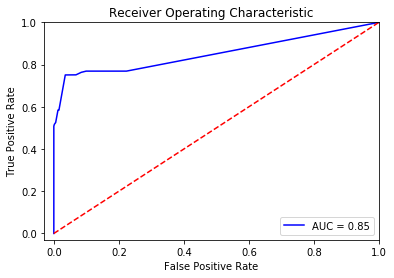

In [38]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1])
plt.ylim([-0.03, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Многослойный персептрон

In [40]:
from sklearn.neural_network import MLPClassifier

In [41]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (2,4), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [ ]:
# y_train_pred = mlp_model.predict(X_train)
# y_test_pred = mlp_model.predict(X_test)

In [42]:
err_train = np.mean(y_train != mlp_model.predict(X_train))
err_test  = np.mean(y_test  != mlp_model.predict(X_test))

print('Ошибка обучения: ', err_train*100, '%', '\nОшибка теста : ', err_test*100,'%\n')
print('Точность обучения: ', 100 - err_train*100, '%', '\nТочность теста : ', 100 - err_test*100,'%')

Ошибка обучения:  1.0448906733601004 % 
Ошибка теста :  1.0245153677305159 %

Точность обучения:  98.9551093266399 % 
Точность теста :  98.97548463226948 %


# Classification report

In [43]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, mlp_model.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    195806
           1       1.00      0.51      0.68      4191

    accuracy                           0.99    199997
   macro avg       0.99      0.76      0.84    199997
weighted avg       0.99      0.99      0.99    199997



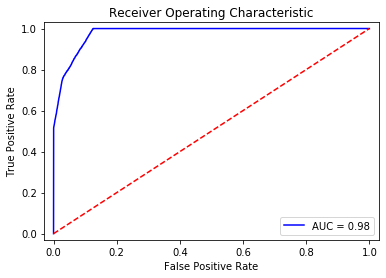

In [47]:
import sklearn.metrics as metrics
tr_probs = mlp_model.predict_proba(X_test)
tr_preds = tr_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tr_preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.03])
plt.ylim([-0.03, 1.03])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# GBT

In [31]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 50)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Ошибка обучения: ', err_train*100, '%', '\nОшибка теста : ', err_test*100,'%\n')
print('Точность обучения: ', 100 - err_train*100, '%', '\nТочность теста : ', 100 - err_test*100,'%')

Ошибка обучения:  1.0451406771101566 % 
Ошибка теста :  1.027515412731191 %

Точность обучения:  98.95485932288985 % 
Точность теста :  98.97248458726881 %


In [32]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_test, gbt.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    195806
           1       1.00      0.51      0.68      4191

    accuracy                           0.99    199997
   macro avg       0.99      0.75      0.83    199997
weighted avg       0.99      0.99      0.99    199997



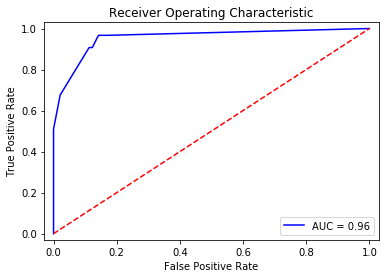

In [33]:
import sklearn.metrics as metrics
tr_probs = gbt.predict_proba(X_test)
tr_preds = tr_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tr_preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.03])
plt.ylim([-0.03, 1.03])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()